In [1]:
%reload_ext autoreload
%autoreload 2

##### Define ChEMBL and Papyrus versions

In [2]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [3]:
annotation_round = 2

##### Define output directory

In [6]:
from mutants_in_pcm import data_path
data_path.data_dir = '../data'

In [7]:
from utils import get_mutant_analysis_path
accession_analysis_dir = get_mutant_analysis_path('1_mutant_statistics', 'accession', annotation_round)

Created directory C:\Users\ojbeq\Documents\GitHub\mutants-in-pcm\analysis\1_mutant_statistics\1_target_stats.
Created directory C:\Users\ojbeq\Documents\GitHub\mutants-in-pcm\analysis\1_mutant_statistics\1_target_stats\round_2.


##### Import analysis functions

In [8]:
from mutants_in_pcm.mutant_analysis_accession import *
from mutants_in_pcm.mutant_analysis_family import obtain_chembl_family,group_families
from mutants_in_pcm.mutant_analysis_organism import annotate_organism_taxonomy

#### Calculate statistics per protein accession

<b>NOTE:</b> Variants with undefined mutants (i.e. target_id = accession_MUTANT) are also included in this analysis.
Check the variant statistics table some cells below to see if some of the variants are undefined.

In [9]:
stats_protein = get_statistics_across_accessions(chembl_version, papyrus_version, papyrus_flavor, 1_000_000,
                                                 annotation_round, accession_analysis_dir, save=False)
stats_protein

,accession,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol
0,A0A045ISB3,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN
1,A2RI47,23,17.0,7,26.086957,Other,Other,Other,Other,Other,Lactococcus lactis subsp. cremoris (strain MG1...,NaN
2,A3EZI9,794,673.0,7,15.239295,Enzyme,Protease,Serine protease,Serine protease PA clan,Serine protease S29 family,Hepacivirus C,NaN
3,A3EZJ3,783,746.0,17,4.725415,Other,Other,Other,Other,Other,Hepacivirus C,NaN
4,A4TVL0,25,22.0,2,12.000000,Other,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
330,Q9WKE8,111,0.0,6,100.000000,Enzyme,Other,Other,Other,Other,Human immunodeficiency virus 1,NaN
331,Q9Y243,416,406.0,2,2.403846,Enzyme,Kinase,Protein Kinase,AGC protein kinase group,AGC protein kinase AKT family,Homo sapiens (Human),AKT3
332,Q9Y2R2,279,272.0,8,2.508961,Enzyme,Phosphatase,Protein Phosphatase,Tyrosine protein phosphatase,Other,Homo sapiens (Human),PTPN22
333,Q9Y5X5,129,116.0,7,10.077519,Membrane receptor,GPCR,Peptide receptor (family A GPCR),Short peptide receptor (family A GPCR),RF amide receptor,Homo sapiens (Human),NPFFR2


Check which proteins satisfy certain criteria, for example to mention in the manuscript:

In [10]:
filter_statistics(stats_protein,
                  min_data=10000,
                  max_data=None,
                  min_percentage=0,
                  max_perccentage=None,
                  min_variants=0,
                  max_variants=None,
                  sort_output_by='connectivity')

Accession codes for filtered accessions (3):
P00352, P42336, P00533
Gene names for filtered accessions:
ALDH1A1, PIK3CA, EGFR


,accession,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol
37,P00352,20056,20054.0,2,0.009972,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),ALDH1A1
185,P42336,14050,13802.0,15,1.765125,Enzyme,Transferase,Other,Other,Other,Homo sapiens (Human),PIK3CA
43,P00533,13601,11103.0,13,18.366297,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase EGFR family,Homo sapiens (Human),EGFR


In [11]:
filter_statistics(stats_protein,
                  min_data=0,
                  max_data=None,
                  min_percentage=0,
                  max_perccentage=None,
                  min_variants=20,
                  max_variants=None,
                  sort_output_by='connectivity')

Accession codes for filtered accessions (9):
Q72547, Q72874, P0DMS8, P30968, P08483, P61073, P47900, P34975, P48065
Gene names for filtered accessions:
N/A, N/A, ADORA3, GNRHR, CHRM3, CXCR4, P2RY1, OPRK1, N/A


,accession,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol
277,Q72547,6953,4590.0,47,33.985330,Enzyme,Hydrolase,Other,Other,Other,Human immunodeficiency virus 1,NaN
278,Q72874,4143,3831.0,33,7.530775,Enzyme,Protease,Aspartic protease,Aspartic protease AA clan,Aspartic protease A2A subfamily,Human immunodeficiency virus 1,NaN
86,P0DMS8,4118,4047.0,20,1.724138,Membrane receptor,GPCR,Small molecule receptor (family A GPCR),Nucleotide-like receptor (family A GPCR),Adenosine receptor,Homo sapiens (Human),ADORA3
155,P30968,1921,1465.0,71,23.737637,Membrane receptor,GPCR,Peptide receptor (family A GPCR),Short peptide receptor (family A GPCR),GnRH receptor,Homo sapiens (Human),GNRHR
75,P08483,1095,1073.0,21,2.009132,Membrane receptor,GPCR,Small molecule receptor (family A GPCR),Monoamine receptor,Acetylcholine receptor,Rattus norvegicus (Rat),CHRM3
218,P61073,900,788.0,39,12.444444,Membrane receptor,GPCR,Peptide receptor (family A GPCR),Chemokine receptor,CXC chemokine receptor,Homo sapiens (Human),CXCR4
195,P47900,623,567.0,41,8.988764,Membrane receptor,GPCR,Small molecule receptor (family A GPCR),Nucleotide-like receptor (family A GPCR),Purine receptor,Homo sapiens (Human),P2RY1
167,P34975,573,528.0,24,7.853403,Membrane receptor,GPCR,Peptide receptor (family A GPCR),Short peptide receptor (family A GPCR),Opioid receptor,Rattus norvegicus (Rat),OPRK1
197,P48065,71,20.0,24,71.830986,Transporter,Electrochemical transporter,SLC superfamily of solute carriers,SLC06 neurotransmitter transporter family,Other,Homo sapiens (Human),NaN


In [12]:
filter_statistics(stats_protein,
                  min_data=1000,
                  max_data=None,
                  min_percentage=10,
                  max_perccentage=None,
                  min_variants=0,
                  max_variants=None,
                  sort_output_by='connectivity')

Accession codes for filtered accessions (13):
P00533, Q72547, P00519, P15056, P36888, O60885, P10721, Q5S007, Q9UM73, P23443, O75874, P07949, P30968
Gene names for filtered accessions:
EGFR, N/A, ABL1, BRAF;B-Raf, FLT3, BRD4, KIT, LRRK2, ALK, RPS6KB1, IDH1, RET, GNRHR


,accession,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol
43,P00533,13601,11103.0,13,18.366297,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase EGFR family,Homo sapiens (Human),EGFR
277,Q72547,6953,4590.0,47,33.985330,Enzyme,Hydrolase,Other,Other,Other,Human immunodeficiency virus 1,NaN
40,P00519,4985,3872.0,16,22.326981,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase Abl family,Homo sapiens (Human),ABL1
107,P15056,4740,1883.0,2,60.274262,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,TKL protein kinase RAF family,Homo sapiens (Human),BRAF;B-Raf
176,P36888,4390,3873.0,8,11.776765,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3
28,O60885,4106,3405.0,6,17.072577,Epigenetic regulator,Reader,Bromodomain,Other,Other,Homo sapiens (Human),BRD4
90,P10721,2897,2334.0,19,19.433897,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),KIT
273,Q5S007,2760,1822.0,4,33.985507,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,TKL protein kinase LRRK family,Homo sapiens (Human),LRRK2
328,Q9UM73,2598,1950.0,12,24.942263,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,TKL protein kinase STKR family,Homo sapiens (Human),ALK
133,P23443,2286,1024.0,3,55.205599,Enzyme,Kinase,Protein Kinase,AGC protein kinase group,AGC protein kinase RSK family,Homo sapiens (Human),RPS6KB1


##### Check proteins with no WT data

In [13]:
stats_protein[stats_protein['connectivity_mutant_percentage'] == 100]

,accession,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol
7,B7UPE2,7,0.0,2,100.0,Enzyme,Transferase,Other,Other,Other,Escherichia coli O127:H6 (strain E2348/69 / EPEC),NaN
10,C6ARS9,4,0.0,2,100.0,Enzyme,Hydrolase,Other,Other,Other,Rhizobium leguminosarum bv. trifolii (strain W...,NaN
13,K7XJL6,61,0.0,3,100.0,Other,Other,Other,Other,Other,Hepacivirus C,NaN
25,O59010,2,0.0,2,100.0,Transporter,Electrochemical transporter,Other,Other,Other,Pyrococcus horikoshii (strain ATCC 700860 / DS...,NaN
44,P00720,17,0.0,4,100.0,Enzyme,Hydrolase,Other,Other,Other,Enterobacteria phage T4 (Bacteriophage T4),NaN
217,P58335,8,0.0,3,100.0,Other,Other,Other,Other,Other,Homo sapiens (Human),NaN
251,Q0ZMF1,121,0.0,4,100.0,Enzyme,Protease,Serine protease,Other,Other,Hepatitis C virus subtype 1b,NaN
286,Q8AAK6,28,0.0,6,100.0,Enzyme,Hydrolase,Other,Other,Other,Bacteroides thetaiotaomicron (strain ATCC 2914...,NaN
330,Q9WKE8,111,0.0,6,100.0,Enzyme,Other,Other,Other,Other,Human immunodeficiency virus 1,NaN


##### Plot statistics in bubble plots
To explore the amount of bioactivity data, mutant bioactivity data, and number of variants available per protein

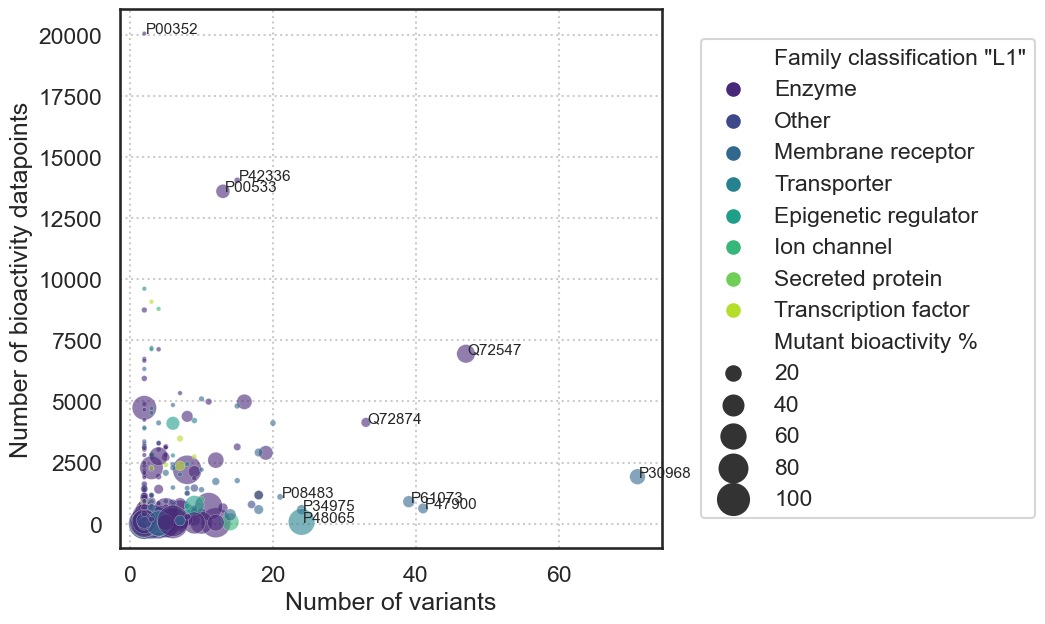

In [14]:
plot_stats_bubble(stats_protein,
                  filter_tag='',
                  hue_property='l1',
                  hue_title='Family classification "L1"',
                  label_condition='connectivity',
                  xy_lims=None,
                  output_dir=accession_analysis_dir,
                  save=True)

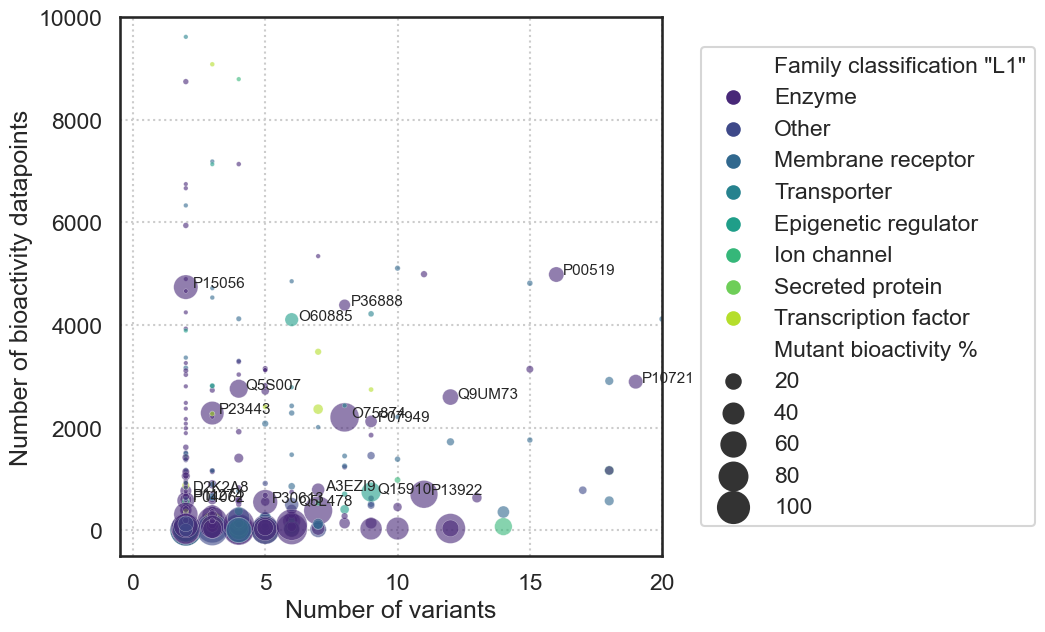

In [15]:
# Zoom into the most populated area
plot_stats_bubble(stats_protein,
                  filter_tag='',
                  hue_property='l1',
                  hue_title='Family classification "L1"',
                  label_condition='connectivity_mutant_percentage',
                  xy_lims=[(-0.5,20),(-500,10000)],
                  output_dir=accession_analysis_dir,
                  save=True)

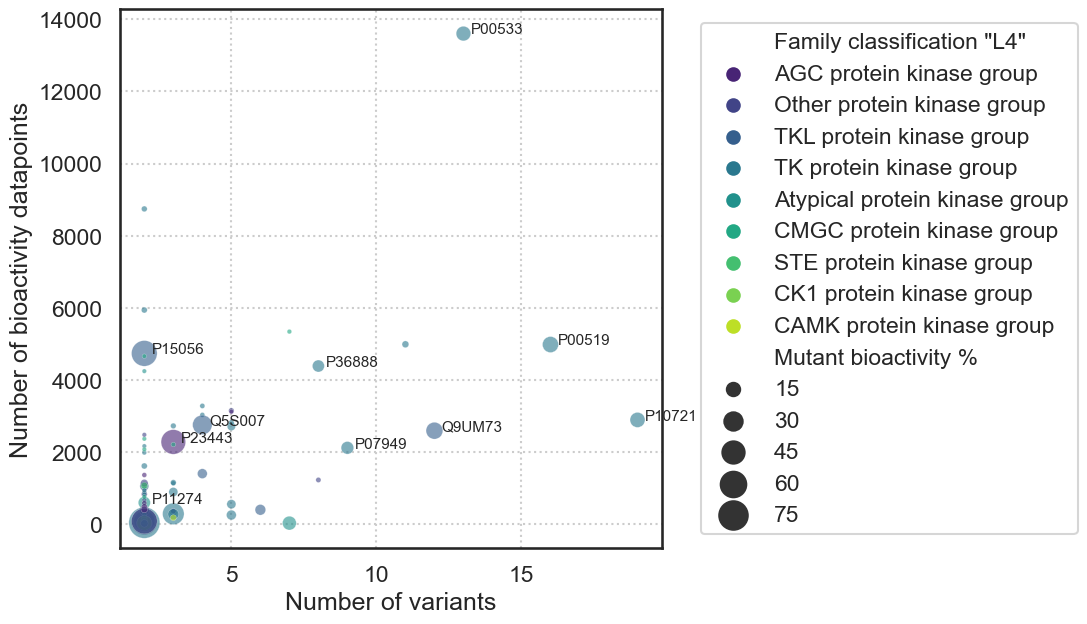

In [16]:
# Plot only kinases
plot_stats_bubble(stats_protein[stats_protein['l2'] == 'Kinase'],
                  filter_tag='L2Kinase',
                  hue_property='l4',
                  hue_title='Family classification "L4"',
                  label_condition='connectivity_mutant_percentage',
                  xy_lims=None,
                  output_dir=accession_analysis_dir,
                  save=True)

##### Plot main statistics in histograms
To explore the density of proteins regarding different properties

In [17]:
plot_stats_histograms(stats_protein, accession_analysis_dir, save=True)

<Figure size 640x480 with 0 Axes>

#### Calculate statistics per variant (target_id)

<b>NOTE:</b> Variants with undefined mutants (i.e. target_id = accession_MUTANT) are also included in this analysis.
Check the statistics table to see if some of the variants are undefined.

In [18]:
stats_variant = get_statistics_across_variants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000,
                                               annotation_round, accession_analysis_dir,save=False)
stats_variant

,accession,variant,connectivity_variant,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol,connectivity_variant_percentage,variant_order,connectivity_variant_fold
0,A0A045ISB3,A0A045ISB3_F161S,4,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,2,61.250000
1,A0A045ISB3,A0A045ISB3_I203A,4,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,3,61.250000
2,A0A045ISB3,A0A045ISB3_I207A,4,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,5,61.250000
3,A0A045ISB3,A0A045ISB3_I207K,4,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,4,61.250000
4,A0A045ISB3,A0A045ISB3_WT,245,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,93.869732,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,Q9YQ12,Q9YQ12_V32I_L33F_I54M_V82I,2,1168,1092.0,18,6.506849,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily,Human immunodeficiency virus 1,NaN,0.171233,8,546.000000
1748,Q9YQ12,Q9YQ12_V32I_M46I_I47V_Q58E_I84V,11,1168,1092.0,18,6.506849,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily,Human immunodeficiency virus 1,NaN,0.941781,4,99.272727
1749,Q9YQ12,Q9YQ12_V82A,4,1168,1092.0,18,6.506849,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily,Human immunodeficiency virus 1,NaN,0.342466,5,273.000000
1750,Q9YQ12,Q9YQ12_V82F,3,1168,1092.0,18,6.506849,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily,Human immunodeficiency virus 1,NaN,0.256849,6,364.000000


##### Filter variants for accessions with mutant percentage over 10% and more than 1,000 bioactivity data

In [21]:
stats_variant_filtered = filter_statistics(stats_variant,
                                           min_data=1000,
                                           max_data=None,
                                           min_percentage=10,
                                           max_perccentage=None,
                                           min_variants=0,
                                           max_variants=None,
                                           sort_output_by='connectivity_mutant_percentage')
variants_filter_tag = 'C1000P10' # To identify in the upcoming plots that the stats were filtered
stats_variant_filtered.to_excel(os.path.join(accession_analysis_dir,
                                           f'stats_per_variant_round_{annotation_round}_{variants_filter_tag}.xlsx'))
stats_variant_filtered

Accession codes for filtered accessions (13):
O75874, P15056, P23443, Q5S007, Q72547, Q9UM73, P30968, P00519, P10721, P00533, O60885, P07949, P36888
Gene names for filtered accessions:
IDH1, BRAF;B-Raf, RPS6KB1, LRRK2, N/A, ALK, GNRHR, ABL1, KIT, EGFR, BRD4, RET, FLT3


,accession,variant,connectivity_variant,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol,connectivity_variant_percentage,variant_order,connectivity_variant_fold
128,O75874,O75874_R132L,11,2203,302.0,8,86.291421,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,0.499319,5,134.090909
126,O75874,O75874_R132G,6,2203,302.0,8,86.291421,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,0.272356,6,245.833333
130,O75874,O75874_WT,302,2203,302.0,8,86.291421,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,13.708579,3,4.884106
129,O75874,O75874_R132S,5,2203,302.0,8,86.291421,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,0.226963,7,295.000000
127,O75874,O75874_R132H,1475,2203,302.0,8,86.291421,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,66.954153,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,P36888,P36888_F691L,38,4390,3873.0,8,11.776765,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3,0.865604,6,101.921053
923,P36888,P36888_K663Q,52,4390,3873.0,8,11.776765,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3,1.184510,5,74.480769
924,P36888,P36888_N841I,70,4390,3873.0,8,11.776765,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3,1.594533,4,55.328571
925,P36888,P36888_R834Q,38,4390,3873.0,8,11.776765,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3,0.865604,7,101.921053


In [22]:
# Check how many acecssions in the filtered set have undefined mutations
stats_variant_filtered[stats_variant_filtered['variant'].str.contains('MUTANT')]

,accession,variant,connectivity_variant,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol,connectivity_variant_percentage,variant_order,connectivity_variant_fold
123,O75874,O75874_MUTANT,3,2203,302.0,8,86.291421,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,0.136178,8,491.666667
1456,Q72547,Q72547_MUTANT,6,6953,4590.0,47,33.985330,Enzyme,Hydrolase,Other,Other,Other,Human immunodeficiency virus 1,NaN,0.086294,20,765.000000
1703,Q9UM73,Q9UM73_MUTANT,14,2598,1950.0,12,24.942263,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,TKL protein kinase STKR family,Homo sapiens (Human),ALK,0.538876,8,139.285714
165,P00519,P00519_MUTANT,46,4985,3872.0,16,22.326981,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase Abl family,Homo sapiens (Human),ABL1,0.922768,10,84.173913
416,P10721,P10721_MUTANT,9,2897,2334.0,19,19.433897,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),KIT,0.310666,10,259.333333


##### Plot amount of data in each variant for the filtered proteins

<b>NOTE:</b> Variants with undefined mutants (i.e. target_id = accession_MUTANT) are also included in this analysis.
Check the statistics table in the cell above to see if some of the variants are undefined.

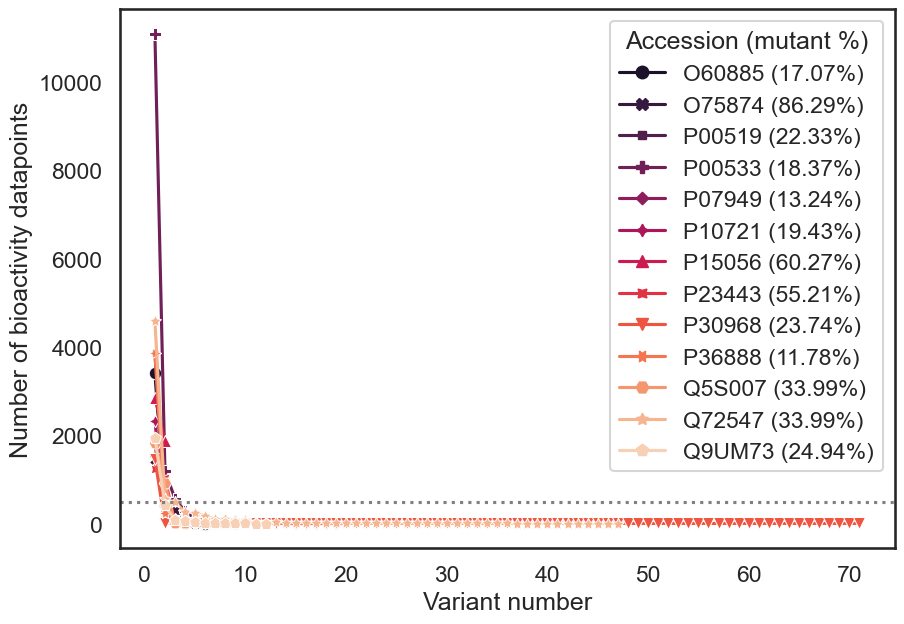

In [23]:
plot_variant_stats_lineplot(stats_variant_filtered,
                            filter_tag=variants_filter_tag,
                            y_column='connectivity_variant',
                            y_label='Number of bioactivity datapoints',
                            xy_lims=None,
                            output_dir=accession_analysis_dir,
                            save=True
                            )

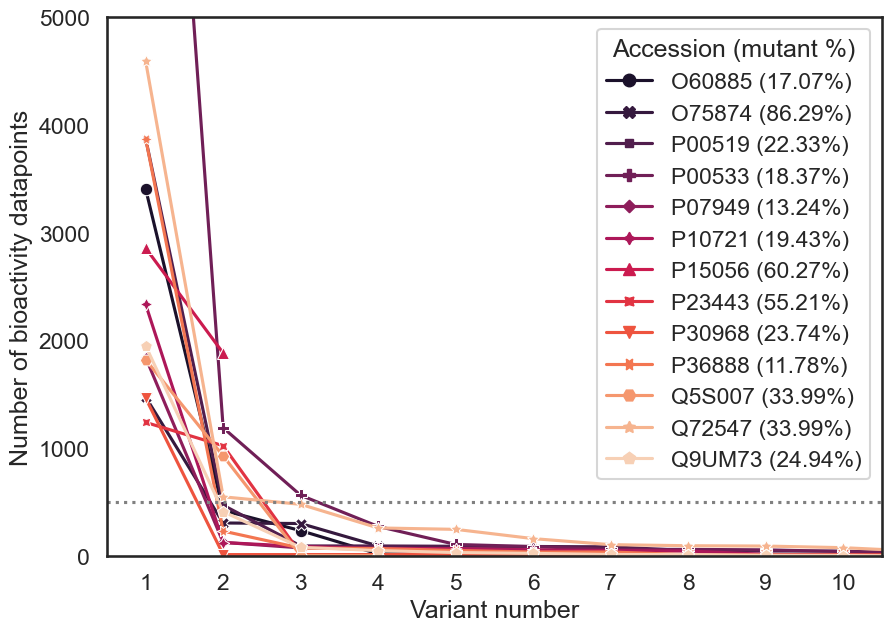

In [24]:
# Plot zooming in
plot_variant_stats_lineplot(stats_variant_filtered,
                            filter_tag=variants_filter_tag,
                            y_column='connectivity_variant',
                            y_label='Number of bioactivity datapoints',
                            xy_lims=[(0.5,10.5),(0,5000)],
                            output_dir=accession_analysis_dir,
                            save=True
                            )

##### Plot correlation between fold-change differences of first and second most populated variants and other variables

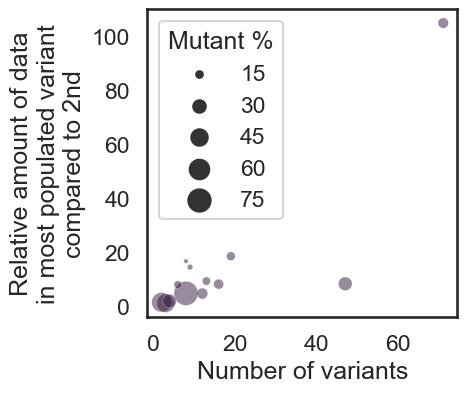

In [25]:
plot_variant_fold_change_stats(stats_variant_filtered,
                               filter_tag=variants_filter_tag,
                               variant_n=2,
                               x_column='target_id',
                               x_label='Number of variants',
                               size_column='connectivity_mutant_percentage',
                               size_label='Mutant %',
                               color='#35193e',
                               output_dir=accession_analysis_dir,
                               save=True)

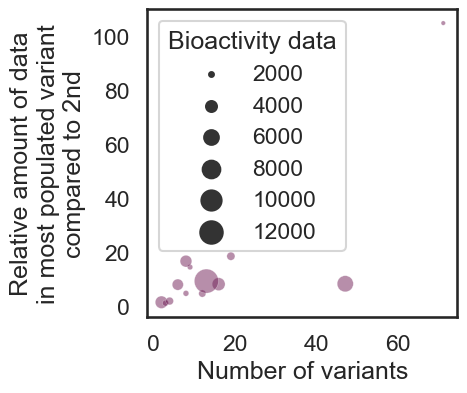

In [26]:
plot_variant_fold_change_stats(stats_variant_filtered,
                               filter_tag=variants_filter_tag,
                               variant_n=2,
                               x_column='target_id',
                               x_label='Number of variants',
                               size_column='connectivity',
                               size_label='Bioactivity data',
                               color='#701f57',
                               output_dir=accession_analysis_dir,
                               save=True)

Check also with a less stringent filter (i.e. only coverage and not bioactivity data)

In [27]:
stats_variant_filtered_2 = filter_statistics(stats_variant,
                                           min_data=0,
                                             max_data=None,
                                           min_percentage=10,
                                             max_perccentage=None,
                                           min_variants=0,
                                             max_variants=None,
                                           sort_output_by='connectivity_mutant_percentage')
variants_filter_tag_2 = 'P10' # To identify in the upcoming plots that the stats were filtered

Accession codes for filtered accessions (105):
P48735, C1KIQ2, Q62120, C4LRQ6, O75874, D5F1R0, P02511, P01116, P0DOF9, P13738, P56690, P13922, Q9NPD8, P48065, Q9GZV3, Q15022, Q9R1C8, P07753, P30613, P21146, Q9P2K8, P15056, Q9NZN5, P00441, Q05320, Q6P988, P23443, Q5NGQ3, Q81R22, P36873, P15682, Q86WV6, Q55664, P21860, P41182, Q10471, Q9EPK8, Q15910, P00520, P40313, Q9KM66, Q5S007, Q72547, Q8II92, Q869C3, P0A017, P23979, P04062, P06821, P04578, P96830, Q8NY00, P0A031, Q9UM07, A2RI47, P29994, P9WPP1, P17865, Q9UM73, Q9UHC9, Q9HC35, P35520, P30968, P00519, P43249, P15038, P10721, P05981, P51149, Q06486, P00533, Q5L478, A5Z252, P04585, O60885, Q7KQK5, P54098, Q9UGC6, Q58F21, P0DOF8, P42346, P9WPP9, Q96HE7, A3EZI9, P49842, P0A749, P07949, P41231, Q13526, P11086, P18090, Q4Q5S8, P61073, P11274, A4TVL0, P36888, O60218, D2K2A8, O95069, P03420, P02766, Q96SW2, Q04828, P55859, Q9Y5X5
Gene names for filtered accessions:
N/A, N/A, N/A, N/A, IDH1, N/A, N/A, N/A, N/A, N/A, N/A, N/A, N/A, N/A, SLC5A7,

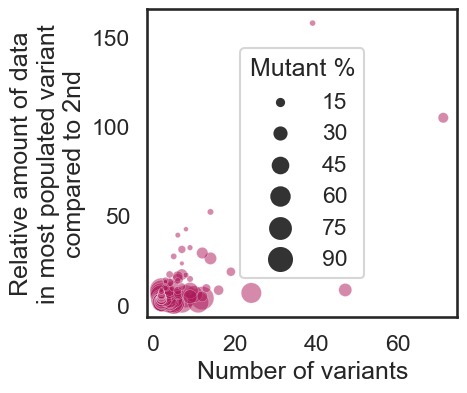

In [28]:
plot_variant_fold_change_stats(stats_variant_filtered_2,
                               filter_tag=variants_filter_tag_2,
                               variant_n=2,
                               x_column='target_id',
                               x_label='Number of variants',
                               size_column='connectivity_mutant_percentage',
                               size_label='Mutant %',
                               color='#ad1759',
                               output_dir=accession_analysis_dir,
                               save=True)

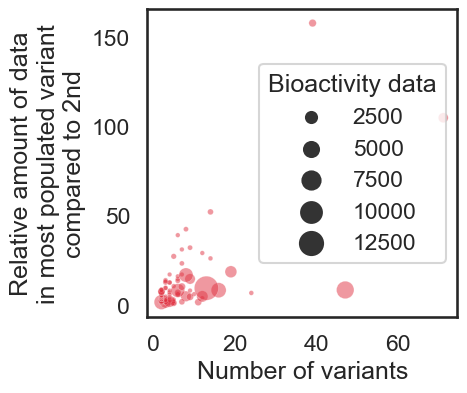

In [29]:
plot_variant_fold_change_stats(stats_variant_filtered_2,
                               filter_tag=variants_filter_tag_2,
                               variant_n=2,
                               x_column='target_id',
                               x_label='Number of variants',
                               size_column='connectivity',
                               size_label='Bioactivity data',
                               color='#e13342',
                               output_dir=accession_analysis_dir,
                               save=True)